# <font color='#d50283'>IT Academy </font>
## S04 T01: Transformació Registre Log amb Regular expressions

### Luis Ortas




In [21]:
import pandas as pd
import numpy as np
from datetime import datetime

import re
import requests
import json
import pytz #for time zones
import matplotlib.pyplot as plt
import seaborn as sns
import ipinfo  # inportamos ipinfo para obtener geolocalización de IP's.

***
# Exercici 1

**Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".**


# Exercici 2
**Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.**

In [3]:
#Data Set
data = pd.read_csv('Web_access_log-akumenius.com.txt', names=['Columna'])#txt file  read_csv
pd.set_option('display.max_colwidth',None)#para obtener toda la información de cada elemente
data.sample(10)#Ejemplos

,Columna
83902,"www.akumenius.com 82.130.160.93 - - [24/Feb/2014:20:34:02 +0100] ""POST /destinos-insert HTTP/1.1"" 200 26 ""http://www.akumenius.com/hoteles-baratos/hoteles-todo-incluido.html"" ""Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML"
39485,"www.akumenius.com 144.76.95.232 - - [23/Feb/2014:23:27:58 +0100] ""GET /destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Islantilla_ESPA%C3%91A-con-Tie HTTP/1.0"" 200 7201 ""-"" ""Mozilla/5.0 (compatible; MJ12bot/v1.4.4; http://www.majestic12.co.uk/bot.php?+)"" VLOG=-"
46189,"www.akumenius.com 180.76.5.98 - - [24/Feb/2014:04:49:50 +0100] ""GET /destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Grande-Prairie_CANADA-con-Plancha-pantalones HTTP/1.1"" 200 8186 ""-"" ""Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)"" VLOG=-"
57336,"test.akumenius.com 80.28.221.123 - - [24/Feb/2014:12:24:14 +0100] ""GET /newdesign/libraries/jqueryui/js/jquery.ui.mouse.min.js HTTP/1.1"" 304 - ""http://test.akumenius.com/newdesign/destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Barcelona_ESPA%C3%91A-con-Accesible-para-minusv%C3%A1lidos"" ""Mozilla/5.0 (X11; U; Linux i686; ca; rv:1.9.2.17) Gecko/20110428 Fedora/3.6.17-1.fc13 Firefox/3.6.17"" VLOG=-"
30770,"www.akumenius.com 66.249.76.216 - - [23/Feb/2014:19:50:57 +0100] ""GET /destinos-baratos/hoteles-baratos/ofertas-hotel-Venus-Hotel-en-Chania-Platanias-178775b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"
55899,"www.akumenius.com 80.58.250.94 - - [24/Feb/2014:12:08:25 +0100] ""GET /modules/raton/views/themes/bcoos/images/boto_home_planea.png HTTP/1.1"" 304 - ""http://www.akumenius.com/hotel-list"" ""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:27.0) Gecko/20100101 Firefox/27.0"" VLOG=-"
51832,"www.akumenius.com 80.28.221.123 - - [24/Feb/2014:09:54:09 +0100] ""GET /awstats/icon/flags/ar.png HTTP/1.1"" 304 - ""http://www.akumenius.com/awstats.pl?framename=mainright"" ""Mozilla/5.0 (X11; U; Linux i686; ca; rv:1.9.2.17) Gecko/20110428 Fedora/3.6.17-1.fc13 Firefox/3.6.17"" VLOG=-"
236918,"www.akumenius.com 188.87.40.180 - - [28/Feb/2014:17:09:15 +0100] ""POST /hotel-list-data/ HTTP/1.1"" 200 9265 ""http://www.akumenius.com/hotel-list"" ""Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML"
119610,"www.akumenius.com 85.56.48.247 - - [25/Feb/2014:16:40:28 +0100] ""GET /libraries/jqueryui/css/ui-lightness/jquery.ui.button.css HTTP/1.1"" 200 2471 ""http://www.akumenius.com/hotel-list/20030/BO/Riu%20Palace%20Algarve"" ""Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.36 (KHTML"
178329,"www.akumenius.com 173.252.120.117 - - [26/Feb/2014:22:34:25 +0100] ""GET /modules/raton/views/themes/bcoos/images/boto_home_planea.png HTTP/1.1"" 200 7452 ""http://www.akumenius.com/hoteles-baratos/ofertas-hotel-Holiday-Inn-Buenos-Aires-Ezeiza-Airport-en-Downtown-161882b-destinos.html"" ""facebookexternalhit/1.1 (+http://www.facebook.com/externalhit_uatext.php)"" VLOG=-"


Utilizaremos como referencia el articulo Reference and sample code for loading logs in pandas: https://mmas.github.io/read-apache-access-log-pandas.
Pero separaremos las columnas una a una para desarrollar otros patrones.


Las columnas que separeremos serán:


* 'virtual_host'
* 'ip'
* 'time'
* ''tipo'
* 'get'
* 'Numero'
* 'Navegador'


In [4]:
## Separamos en columnas las separadas por "
# 
columnas = data['Columna'].str.split(r'\"',6, expand=True) # Realiza 6 separaciones. 7 columnas.

columnas.tail()

,0,1,2,3,4,5,6
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/2014:03:05:39 +0100],GET / HTTP/1.1,200 7528,-,,Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots),VLOG=-
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/2014:03:09:52 +0100],HEAD / HTTP/1.1,200 -,-,,Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/),VLOG=-
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100],OPTIONS * HTTP/1.0,200 -,-,,Apache (internal dummy connection),VLOG=-
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100],OPTIONS * HTTP/1.0,200 -,-,,Apache (internal dummy connection),VLOG=-
261872,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100],OPTIONS * HTTP/1.0,200 -,-,,Apache (internal dummy connection),VLOG=-


In [5]:
columnas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       261873 non-null  object
 1   1       261873 non-null  object
 2   2       261775 non-null  object
 3   3       261775 non-null  object
 4   4       261637 non-null  object
 5   5       261637 non-null  object
 6   6       168018 non-null  object
dtypes: object(7)
memory usage: 14.0+ MB


Creamos la primera columna "Virtual host"
Separamos el primer texto hasta el primer espacio.

In [10]:
# Separamos el primer texto hasta el primer espacio.

# Creamos la primera columna "Virtual host"
data1=data.copy()
patron=r'(\S+)'
data1['Virtual_host']=columnas[0].map(lambda p: re.search(patron,p).group())
data1.drop(['Columna'], axis=1, inplace=True)
data1.sample(5)

,Virtual_host
192788,www.akumenius.com
28999,www.akumenius.com
123731,www.akumenius.com
135265,www.akumenius.com
21765,www.akumenius.com


Creamos la columna 'ip' utilizando la expresión (\s(\d+.)+)' aplicandolo a la columnba 0 de columnas medianta map.

In [11]:
# utilizamos la expresión R
# ip
patron=r'(\s(\d+.)+)'
data1['Ip']=columnas[0].map(lambda p: re.search(patron,p).group())

data1.sample(5)

,Virtual_host,Ip
45534,www.akumenius.com,157.55.34.183
54930,www.akumenius.com,80.58.250.94
41247,www.akumenius.com,66.249.76.216
124316,www.akumenius.com,31.4.188.61
261517,www.akumenius.com,83.63.131.193


Creamos la columna "time" aplicando r'\d{1,2}\/\w{1,3}\/\d{1,4}\:\d{1,2}\:\d{1,2}\:\d{1,2}\s\D\d{1,4}' a los  elementos de la columna 0 del df columnas

In [12]:
patron=r'\d{1,2}\/\w{1,3}\/\d{1,4}\:\d{1,2}\:\d{1,2}\:\d{1,2}\s\D\d{1,4}'
data1['time']=columnas[0].map(lambda p: re.search(patron,p).group())

data1.sample()

,Virtual_host,Ip,time
17459,www.akumenius.com,180.76.5.155,23/Feb/2014:13:55:22 +0100


Creamos lanumero en la tercera columna del df columnas separando el por el guión '-'

In [13]:
#numero


data1.sample(3)
data1['Numero']=columnas[2].str.strip(' - ')

data1

,Virtual_host,Ip,time,Numero
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200
...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39 +0100,200 7528
261869,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52 +0100,200
261870,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,200
261871,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,200


Creamos la columna  get. Es la segunda columna del df columnas.

In [14]:
## get (columna temporañ)
data1['get']=columnas[1]
data1.sample(5)

,Virtual_host,Ip,time,Numero,get
99821,www.akumenius.com,217.125.71.222,25/Feb/2014:11:08:08 +0100,304,GET /includes/images/uploaded/Slideshow/TRUJILLO.png HTTP/1.1
118722,www.akumenius.com,80.39.169.253,25/Feb/2014:16:31:09 +0100,200 14929,GET /includes/images/uploaded/ofertas-forfait.jpg HTTP/1.1
35866,www.akumenius.com,66.249.76.216,23/Feb/2014:21:53:55 +0100,200 8815,GET /destinos-baratos/destinosEstrelles/hoteles-en-Sch%C3%B6nwies_AUSTRIA-con-2-estrellas HTTP/1.1
106251,www.akumenius.com,95.172.68.149,25/Feb/2014:13:43:54 +0100,200 2167,GET /modules/raton/views/themes/bcoos/images/buscadores/icono-facebook.png HTTP/1.1
118885,www.akumenius.com,80.39.169.253,25/Feb/2014:16:32:04 +0100,200 1140,GET /libraries/jqueryui/css/ui-lightness/jquery.ui.slider.css HTTP/1.1


Creamos las columnas tipo, separandola de get. 

In [16]:
## tipo y get
data1[['tipo','get']] = data1['get'].str.split(r'\s',1, expand=True)
data1

,Virtual_host,Ip,time,Numero,get,tipo
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS
...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39 +0100,200 7528,/ HTTP/1.1,GET
261869,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52 +0100,200,/ HTTP/1.1,HEAD
261870,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,200,* HTTP/1.0,OPTIONS
261871,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,200,* HTTP/1.0,OPTIONS


Extraemos la columna Navegador de la 6 columna del df columnas

In [17]:
# nvaegador
data1[['Navegador','borrar']] = columnas[5].str.split('\(',1, expand=True)
data1.drop(['borrar'], axis=1, inplace=True)
data1.sample(3)

,Virtual_host,Ip,time,Numero,get,tipo,Navegador
154265,www.akumenius.com,81.39.110.171,26/Feb/2014:10:36:31 +0100,200 14172,/modules/raton/views/themes/bcoos/js/blocks/buscadorApaisado.js HTTP/1.1,GET,Mozilla/5.0
230751,www.akumenius.com,62.117.197.230,28/Feb/2014:09:43:53 +0100,304,//libraries/anythingSlider/images/6a.png HTTP/1.1,GET,Mozilla/4.0
76627,www.akumenius.com,89.29.152.238,24/Feb/2014:17:05:41 +0100,200 3762,/libraries/jqueryui/css/ui-lightness/images/ui-bg_gloss-wave_35_f6a828_500x100.png HTTP/1.1,GET,Mozilla/5.0


In [80]:
data1

,Virtual_host,Ip,time,Numero,get,tipo,Navegador
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS,Apache
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS,Apache
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS,Apache
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS,Apache
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,200,* HTTP/1.0,OPTIONS,Apache
...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39 +0100,200 7528,/ HTTP/1.1,GET,Mozilla/5.0
261869,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52 +0100,200,/ HTTP/1.1,HEAD,Mozilla/5.0+
261870,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,200,* HTTP/1.0,OPTIONS,Apache
261871,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,200,* HTTP/1.0,OPTIONS,Apache


In [18]:
# reordenamos las columnas
df_log= data1[['Virtual_host', 'Ip', 'time', 'tipo', 'get', 'Numero', 'Navegador']]
df_log.sample(10)

,Virtual_host,Ip,time,tipo,get,Numero,Navegador
88364,www.akumenius.com,83.49.12.226,24/Feb/2014:23:01:50 +0100,GET,/modules/raton/views/themes/bcoos/js/ga.js HTTP/1.1,200 419,Mozilla/5.0
138564,www.akumenius.com,109.235.22.27,25/Feb/2014:21:10:40 +0100,GET,/escapadas/escapada-golf-islantilla-golf-resort-0437afab49458d7bd5a48954a459ad6d.html HTTP/1.1,200 5511,Mozilla/5.0
97645,www.akumenius.com,66.249.76.216,25/Feb/2014:10:09:48 +0100,GET,/destinos-caracteristicas/hoteles-baratos-en-ISLA-DE-ISCHIA_ITALIA-con-Ducha HTTP/1.1,200 9951,Mozilla/5.0
113436,www.akumenius.com,81.45.55.8,25/Feb/2014:15:35:54 +0100,GET,/libraries/anythingSlider/images/1r.png HTTP/1.1,200 2324,Mozilla/5.0
170116,localhost,127.0.0.1,26/Feb/2014:17:32:27 +0100,OPTIONS,* HTTP/1.0,200,Apache
57471,www.akumenius.com,195.149.215.221,24/Feb/2014:12:26:53 +0100,GET,/applications/hotel/views/themes/bcoos/css/ie8.css HTTP/1.1,200 3175,Mozilla/4.0
77268,localhost,127.0.0.1,24/Feb/2014:17:18:35 +0100,OPTIONS,* HTTP/1.0,200,Apache
146416,www.akumenius.com,41.98.76.99,26/Feb/2014:00:29:06 +0100,GET,/libraries/slideShowHome/prova/effects.js HTTP/1.1,200 55233,Mozilla/5.0
221518,www.akumenius.com,31.4.236.23,27/Feb/2014:22:50:46 +0100,GET,/libraries/jqueryui/css/ui-lightness/jquery.ui.datepicker.css HTTP/1.1,200 4062,Mozilla/5.0
141166,www.akumenius.com,66.249.76.216,25/Feb/2014:21:58:46 +0100,GET,/destinosCaracteristicas/hoteles-baratos-en-Alpes-Austr%C3%ADacos_AUSTRIA-con-Cambio-de-moneda HTTP/1.1,200 17362,Mozilla/5.0


Damos formato de tiempo. Basado en https://mmas.github.io/read-apache-access-log-pandas. 

In [82]:
#Funcion formato time 

def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))

In [83]:
data1['time']=data1['time'].apply(lambda x: parse_datetime(x))
data1

,Virtual_host,Ip,time,Numero,get,tipo,Navegador
0,localhost,127.0.0.1,2014-02-03 03:10:03+00:10,200,* HTTP/1.0,OPTIONS,Apache
1,localhost,127.0.0.1,2014-02-03 03:10:03+00:10,200,* HTTP/1.0,OPTIONS,Apache
2,localhost,127.0.0.1,2014-02-03 03:10:03+00:10,200,* HTTP/1.0,OPTIONS,Apache
3,localhost,127.0.0.1,2014-02-03 03:10:03+00:10,200,* HTTP/1.0,OPTIONS,Apache
4,localhost,127.0.0.1,2014-02-03 03:10:03+00:10,200,* HTTP/1.0,OPTIONS,Apache
...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:03+00:10,200 7528,/ HTTP/1.1,GET,Mozilla/5.0
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:05+00:10,200,/ HTTP/1.1,HEAD,Mozilla/5.0+
261870,localhost,127.0.0.1,2014-03-02 03:10:01+00:10,200,* HTTP/1.0,OPTIONS,Apache
261871,localhost,127.0.0.1,2014-03-02 03:10:01+00:10,200,* HTTP/1.0,OPTIONS,Apache


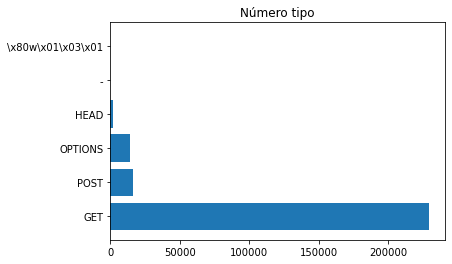

In [29]:
cuenta_tipo=data1.tipo.value_counts()
plt.barh(cuenta_tipo.index, cuenta_tipo)
plt.title('Número tipo')
plt.show()

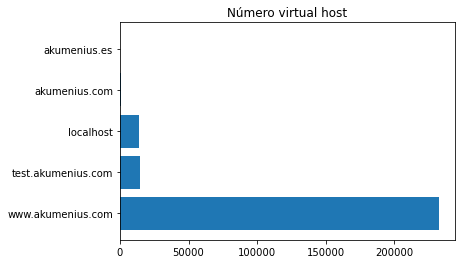

In [26]:
cuenta_host=data1.Virtual_host.value_counts()
plt.barh(cuenta_host.index, cuenta_host)
plt.title('Número virtual host')
plt.show()

***

## Exercici 3

**Geolocalitza les IP's.**

Utilizamos ipinfo. https://github.com/ipinfo/python

In [84]:
#pip install ipinfo

In [85]:
# ejemplo geolocalización

import ipinfo
access_token = 'dd5b85ee6ff406'
handler = ipinfo.getHandler(access_token)
ip_address = '216.239.36.21'
details = handler.getDetails(ip_address)
print(details.country)
print(details.region)
print(details.city)
print(details.loc)
print(details.postal)
print(details.org)
print(details.timezone)


US
California
Mountain View
37.4056,-122.0775
94043
AS15169 Google LLC
America/Los_Angeles


In [86]:
# Creamos un df cuantificando las ip para después geolocalizarlas.

ip_geo = df_log['Ip'].value_counts().rename_axis('ip').reset_index(name="count")

ip_geo

,ip,count
0,66.249.76.216,46382
1,80.28.221.123,14725
2,127.0.0.1,13892
3,217.125.71.222,5201
4,66.249.75.148,3558
...,...,...
2916,66.249.76.219,1
2917,88.3.192.82,1
2918,88.6.30.207,1
2919,202.46.62.97,1


In [87]:
ip_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      2921 non-null   object
 1   count   2921 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


Hay 2921 ip's diferentes

In [88]:

def geo_ip(ip):
    
    '''devuelve la geolaocalización de un ip dada. 
    en caso de error devuelve un geolocalizión estandar'''
    access_token = 'dd5b85ee6ff406'
    try:  
        handler = ipinfo.getHandler(access_token,request_options={'timeout': 100})
        ip_address = ip
    
  
        #consultamos la ip
        details = handler.getDetails(ip_address)
        #convertimos el resultado en diccionarios
        dicc=details.all
        
    except:
        dicc={'ip': '127.0.0.1','bogon': True,' country_name': None, 'latitude': None, 'longitude': None}
   
    
    
    return dicc
   
    
        
        
   

In [89]:
# probamos la función 
ip='127.0.0.1'
geo_ip(ip)


{'ip': '127.0.0.1',
 'bogon': True,
 'country_name': None,
 'latitude': None,
 'longitude': None}

In [ ]:
# Aplicamos apply obtenemos un dicionarios. Que situamos en la columna'geo'
ip_geo['geo']=ip_geo['ip'].apply(lambda ip: geo_ip(ip))  # YA ESTA CALCULADO


In [109]:
#ip_geo.to_csv('ip_geo.csv')  # guardamos el archio para no tener que calcularlo de nuevo.

ip_geo.sample()

,ip,count,geo
1730,157.55.32.99,11,"{'ip': '157.55.32.99', 'city': 'Quincy', 'region': 'Washington', 'country': 'US', 'loc': '47.2343,-119.8525', 'org': 'AS8075 Microsoft Corporation', 'postal': '98848', 'timezone': 'America/Los_Angeles', 'country_name': 'United States', 'latitude': '47.2343', 'longitude': '-119.8525'}"


In [117]:
data_geo=pd.json_normalize(ip_geo['geo'])## normalize funcion para normalizar los 'diccionarios de json'
ip_geo.sort_values(by='ip',ascending=False)

data_geo.sort_values(by='ip',ascending=False)

data_geo['count']=ip_geo['count']

data_geo_def=data_geo[['ip', 'count','country',  'city', 'region', 'latitude','longitude','loc', 'org', 'postal',
       'timezone', 'country_name',   'hostname','bogon', 'anycast']]
data_geo_def

,ip,count,country,city,region,latitude,longitude,loc,org,postal,timezone,country_name,hostname,bogon,anycast
0,66.249.76.216,46382,BE,Brussels,Brussels Capital,50.8505,4.3488,"50.8505,4.3488",AS15169 Google LLC,1000,Europe/Brussels,Belgium,crawl-66-249-76-216.googlebot.com,NaN,NaN
1,80.28.221.123,14725,ES,Madrid,Madrid,40.4165,-3.7026,"40.4165,-3.7026",AS3352 TELEFONICA DE ESPANA,28001,Europe/Madrid,Spain,123.red-80-28-221.staticip.rima-tde.net,NaN,NaN
2,127.0.0.1,13892,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None,NaN,True,NaN
3,217.125.71.222,5201,ES,Sevilla,Andalusia,37.3828,-5.9732,"37.3828,-5.9732",AS3352 TELEFONICA DE ESPANA,41001,Europe/Madrid,Spain,222.red-217-125-71.staticip.rima-tde.net,NaN,NaN
4,66.249.75.148,3558,US,Des Moines,Iowa,41.6005,-93.6091,"41.6005,-93.6091",AS15169 Google LLC,50307,America/Chicago,United States,crawl-66-249-75-148.googlebot.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,54.80.224.86,1,US,Ashburn,Virginia,39.0437,-77.4875,"39.0437,-77.4875","AS14618 Amazon.com, Inc.",20147,America/New_York,United States,ec2-54-80-224-86.compute-1.amazonaws.com,NaN,NaN
2917,31.13.99.112,1,IE,Dublin,Leinster,53.3331,-6.2489,"53.3331,-6.2489","AS32934 Facebook, Inc.",D02,Europe/Dublin,Ireland,NaN,NaN,NaN
2918,183.60.215.54,1,CN,Beijing,Beijing,39.9075,116.3972,"39.9075,116.3972",AS134764 CHINANET Guangdong province network,NaN,Asia/Shanghai,China,NaN,NaN,NaN
2919,202.46.62.205,1,HK,Hong Kong,Central and Western,22.2783,114.1747,"22.2783,114.1747","AS55967 Beijing Baidu Netcom Science and Technology Co., Ltd.",NaN,Asia/Hong_Kong,Hong Kong,ptr.cnsat.com.cn,NaN,NaN


In [111]:
#data_geo_def.to_csv('data_geo_def.csv')


# Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.



In [30]:
data_geo = pd.read_csv('data_geo_def.csv')

In [31]:
data_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2921 non-null   int64  
 1   ip            2921 non-null   object 
 2   count         2921 non-null   int64  
 3   country       2915 non-null   object 
 4   city          2915 non-null   object 
 5   region        2915 non-null   object 
 6   latitude      2920 non-null   float64
 7   longitude     2920 non-null   float64
 8   loc           2920 non-null   object 
 9   org           2870 non-null   object 
 10  postal        2588 non-null   object 
 11  timezone      2915 non-null   object 
 12  country_name  2915 non-null   object 
 13  hostname      2047 non-null   object 
 14  bogon         1 non-null      object 
 15  anycast       1 non-null      object 
dtypes: float64(2), int64(2), object(12)
memory usage: 365.2+ KB


In [32]:
data_geo.isnull().sum()

Unnamed: 0         0
ip                 0
count              0
country            6
city               6
region             6
latitude           1
longitude          1
loc                1
org               51
postal           333
timezone           6
country_name       6
hostname         874
bogon           2920
anycast         2920
dtype: int64

In [33]:
data_geo_map=data_geo[data_geo['longitude'].notna()]
data_geo_map

,Unnamed: 0,ip,count,country,city,region,latitude,longitude,loc,org,postal,timezone,country_name,hostname,bogon,anycast
0,0,66.249.76.216,46382,BE,Brussels,Brussels Capital,50.8505,4.3488,"50.8505,4.3488",AS15169 Google LLC,1000,Europe/Brussels,Belgium,crawl-66-249-76-216.googlebot.com,NaN,NaN
1,1,80.28.221.123,14725,ES,Madrid,Madrid,40.4165,-3.7026,"40.4165,-3.7026",AS3352 TELEFONICA DE ESPANA,28001,Europe/Madrid,Spain,123.red-80-28-221.staticip.rima-tde.net,NaN,NaN
3,3,217.125.71.222,5201,ES,Sevilla,Andalusia,37.3828,-5.9732,"37.3828,-5.9732",AS3352 TELEFONICA DE ESPANA,41001,Europe/Madrid,Spain,222.red-217-125-71.staticip.rima-tde.net,NaN,NaN
4,4,66.249.75.148,3558,US,Des Moines,Iowa,41.6005,-93.6091,"41.6005,-93.6091",AS15169 Google LLC,50307,America/Chicago,United States,crawl-66-249-75-148.googlebot.com,NaN,NaN
5,5,162.243.192.191,2927,US,New York City,New York,40.7402,-73.9996,"40.7402,-73.9996","AS14061 DigitalOcean, LLC",10011,America/New_York,United States,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2916,54.80.224.86,1,US,Ashburn,Virginia,39.0437,-77.4875,"39.0437,-77.4875","AS14618 Amazon.com, Inc.",20147,America/New_York,United States,ec2-54-80-224-86.compute-1.amazonaws.com,NaN,NaN
2917,2917,31.13.99.112,1,IE,Dublin,Leinster,53.3331,-6.2489,"53.3331,-6.2489","AS32934 Facebook, Inc.",D02,Europe/Dublin,Ireland,NaN,NaN,NaN
2918,2918,183.60.215.54,1,CN,Beijing,Beijing,39.9075,116.3972,"39.9075,116.3972",AS134764 CHINANET Guangdong province network,NaN,Asia/Shanghai,China,NaN,NaN,NaN
2919,2919,202.46.62.205,1,HK,Hong Kong,Central and Western,22.2783,114.1747,"22.2783,114.1747","AS55967 Beijing Baidu Netcom Science and Technology Co., Ltd.",NaN,Asia/Hong_Kong,Hong Kong,ptr.cnsat.com.cn,NaN,NaN


In [7]:
data_geo_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 0 to 2920
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2920 non-null   int64  
 1   ip            2920 non-null   object 
 2   count         2920 non-null   int64  
 3   country       2915 non-null   object 
 4   city          2915 non-null   object 
 5   region        2915 non-null   object 
 6   latitude      2920 non-null   float64
 7   longitude     2920 non-null   float64
 8   loc           2920 non-null   object 
 9   org           2870 non-null   object 
 10  postal        2588 non-null   object 
 11  timezone      2915 non-null   object 
 12  country_name  2915 non-null   object 
 13  hostname      2047 non-null   object 
 14  bogon         0 non-null      object 
 15  anycast       1 non-null      object 
dtypes: float64(2), int64(2), object(12)
memory usage: 387.8+ KB


In [8]:
data_geo_map.isnull().sum()

Unnamed: 0         0
ip                 0
count              0
country            5
city               5
region             5
latitude           0
longitude          0
loc                0
org               50
postal           332
timezone           5
country_name       5
hostname         873
bogon           2920
anycast         2919
dtype: int64

**Representaremos cartograficamentes los resultados obtenidos**
Primero realizaremos un mapa coropletico utilizando geopandas.

Referencia Geopandas: https://coderzcolumn.com/tutorials/data-science/plotting-static-maps-with-geopandas-working-with-geospatial-data

In [34]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [35]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [36]:

## revisamos el formato del nombre de los paises. para q e
countries=data_geo_map.country_name.unique()
countries


array(['Belgium', 'Spain', 'United States', 'France', 'Germany',
       'Netherlands', 'Italy', 'Brazil', nan, 'Russia', 'Portugal',
       'Mexico', 'Andorra', 'Argentina', 'Uruguay', 'Sweden',
       'United Kingdom', 'Bonaire, Saint Eustatius and Saba ', 'Austria',
       'Guatemala', 'Colombia', 'Ecuador', 'Dominican Republic',
       'Algeria', 'Nicaragua', 'Puerto Rico', 'Chile', 'Peru',
       'Australia', 'Venezuela', 'Switzerland', 'Egypt', 'Ireland',
       'China', 'Nigeria', 'Mongolia', 'Japan', 'Romania', 'Qatar',
       'Greece', 'Israel', 'Panama', 'Costa Rica', 'Bolivia', 'Curacao',
       'Denmark', 'Bahamas', 'Ukraine', 'Singapore', 'Taiwan', 'Canada',
       'Thailand', 'Hong Kong', 'South Korea', 'Iran', 'Czech Republic',
       'Tunisia', 'Ivory Coast', 'United Arab Emirates', 'Philippines',
       'Indonesia', 'Macedonia', 'Norway', 'Vietnam', 'Poland'],
      dtype=object)

In [37]:
#Revisamos los nombres de paises que no aparecen en en el df world.
fallos_iso=data_geo_map[data_geo_map.country_name.isin(world.name)==False]
fallos_iso.country_name.unique()

array(['United States', nan, 'Andorra',
       'Bonaire, Saint Eustatius and Saba ', 'Dominican Republic',
       'Curacao', 'Singapore', 'Hong Kong', 'Czech Republic',
       'Ivory Coast'], dtype=object)

In [38]:
# definimos una función para normalizar los nombres de paises.
# la aplicamos a los elementos de la columna country_name del df data_geo_map

def corregir_paises(x):
    '''normaliza los nombres de paises'''
    if x=='United States':
        x='United States of America'
    elif x=='Bonaire, Saint Eustatius and Saba ':
        x='Eliminar'
    elif x=='Andorra':
        x='Spain'
    elif x=='Dominican Republic':
        x='Dominican Rep.'
    elif x=='Curacao':
        x='Eliminar'
    elif x=='Singapore':
        x='Eliminar'
    elif x=='Hong Kong':
        x='China'
    elif x=='Czech Republic':
        x='Czechia'
    elif x=='Ivory Coast':
        x='Côte d\'Ivoire'
    else:
        x=x
    return x


data_geo_map['country_name_iso']=data_geo_map['country_name'].apply(lambda x: corregir_paises(x))


data_geo_map

,Unnamed: 0,ip,count,country,city,region,latitude,longitude,loc,org,postal,timezone,country_name,hostname,bogon,anycast,country_name_iso
0,0,66.249.76.216,46382,BE,Brussels,Brussels Capital,50.8505,4.3488,"50.8505,4.3488",AS15169 Google LLC,1000,Europe/Brussels,Belgium,crawl-66-249-76-216.googlebot.com,NaN,NaN,Belgium
1,1,80.28.221.123,14725,ES,Madrid,Madrid,40.4165,-3.7026,"40.4165,-3.7026",AS3352 TELEFONICA DE ESPANA,28001,Europe/Madrid,Spain,123.red-80-28-221.staticip.rima-tde.net,NaN,NaN,Spain
3,3,217.125.71.222,5201,ES,Sevilla,Andalusia,37.3828,-5.9732,"37.3828,-5.9732",AS3352 TELEFONICA DE ESPANA,41001,Europe/Madrid,Spain,222.red-217-125-71.staticip.rima-tde.net,NaN,NaN,Spain
4,4,66.249.75.148,3558,US,Des Moines,Iowa,41.6005,-93.6091,"41.6005,-93.6091",AS15169 Google LLC,50307,America/Chicago,United States,crawl-66-249-75-148.googlebot.com,NaN,NaN,United States of America
5,5,162.243.192.191,2927,US,New York City,New York,40.7402,-73.9996,"40.7402,-73.9996","AS14061 DigitalOcean, LLC",10011,America/New_York,United States,NaN,NaN,NaN,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2916,54.80.224.86,1,US,Ashburn,Virginia,39.0437,-77.4875,"39.0437,-77.4875","AS14618 Amazon.com, Inc.",20147,America/New_York,United States,ec2-54-80-224-86.compute-1.amazonaws.com,NaN,NaN,United States of America
2917,2917,31.13.99.112,1,IE,Dublin,Leinster,53.3331,-6.2489,"53.3331,-6.2489","AS32934 Facebook, Inc.",D02,Europe/Dublin,Ireland,NaN,NaN,NaN,Ireland
2918,2918,183.60.215.54,1,CN,Beijing,Beijing,39.9075,116.3972,"39.9075,116.3972",AS134764 CHINANET Guangdong province network,NaN,Asia/Shanghai,China,NaN,NaN,NaN,China
2919,2919,202.46.62.205,1,HK,Hong Kong,Central and Western,22.2783,114.1747,"22.2783,114.1747","AS55967 Beijing Baidu Netcom Science and Technology Co., Ltd.",NaN,Asia/Hong_Kong,Hong Kong,ptr.cnsat.com.cn,NaN,NaN,China


In [39]:
# Definimos df data_geo_iso solo continene en la columna country_name_iso los nombres 
data_geo_iso= data_geo_map[data_geo_map.country_name_iso.isin(world.name)==True]
data_geo_iso

,Unnamed: 0,ip,count,country,city,region,latitude,longitude,loc,org,postal,timezone,country_name,hostname,bogon,anycast,country_name_iso
0,0,66.249.76.216,46382,BE,Brussels,Brussels Capital,50.8505,4.3488,"50.8505,4.3488",AS15169 Google LLC,1000,Europe/Brussels,Belgium,crawl-66-249-76-216.googlebot.com,NaN,NaN,Belgium
1,1,80.28.221.123,14725,ES,Madrid,Madrid,40.4165,-3.7026,"40.4165,-3.7026",AS3352 TELEFONICA DE ESPANA,28001,Europe/Madrid,Spain,123.red-80-28-221.staticip.rima-tde.net,NaN,NaN,Spain
3,3,217.125.71.222,5201,ES,Sevilla,Andalusia,37.3828,-5.9732,"37.3828,-5.9732",AS3352 TELEFONICA DE ESPANA,41001,Europe/Madrid,Spain,222.red-217-125-71.staticip.rima-tde.net,NaN,NaN,Spain
4,4,66.249.75.148,3558,US,Des Moines,Iowa,41.6005,-93.6091,"41.6005,-93.6091",AS15169 Google LLC,50307,America/Chicago,United States,crawl-66-249-75-148.googlebot.com,NaN,NaN,United States of America
5,5,162.243.192.191,2927,US,New York City,New York,40.7402,-73.9996,"40.7402,-73.9996","AS14061 DigitalOcean, LLC",10011,America/New_York,United States,NaN,NaN,NaN,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2916,54.80.224.86,1,US,Ashburn,Virginia,39.0437,-77.4875,"39.0437,-77.4875","AS14618 Amazon.com, Inc.",20147,America/New_York,United States,ec2-54-80-224-86.compute-1.amazonaws.com,NaN,NaN,United States of America
2917,2917,31.13.99.112,1,IE,Dublin,Leinster,53.3331,-6.2489,"53.3331,-6.2489","AS32934 Facebook, Inc.",D02,Europe/Dublin,Ireland,NaN,NaN,NaN,Ireland
2918,2918,183.60.215.54,1,CN,Beijing,Beijing,39.9075,116.3972,"39.9075,116.3972",AS134764 CHINANET Guangdong province network,NaN,Asia/Shanghai,China,NaN,NaN,NaN,China
2919,2919,202.46.62.205,1,HK,Hong Kong,Central and Western,22.2783,114.1747,"22.2783,114.1747","AS55967 Beijing Baidu Netcom Science and Technology Co., Ltd.",NaN,Asia/Hong_Kong,Hong Kong,ptr.cnsat.com.cn,NaN,NaN,China


In [40]:
# Definimos dataframe que cuantifica los casos de los paises.
data_geo_iso=data_geo_iso.groupby('country_name_iso').agg({'count':sum})
data_geo_iso.reset_index()

,country_name_iso,count
0,Algeria,119
1,Argentina,1007
2,Australia,80
3,Austria,224
4,Bahamas,20
5,Belgium,47266
6,Bolivia,71
7,Brazil,1107
8,Canada,16
9,Chile,357


In [41]:
# fusionamos df por coincidencia 'name->'country_name_iso'
world_ip_final = world.merge(data_geo_iso, how="left", left_on=['name'], right_on=['country_name_iso'])
print("Type of DataFrame : ", type(world_ip_final))

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'>


### Mapa coroplético

Text(0.5, 1.0, 'IP')

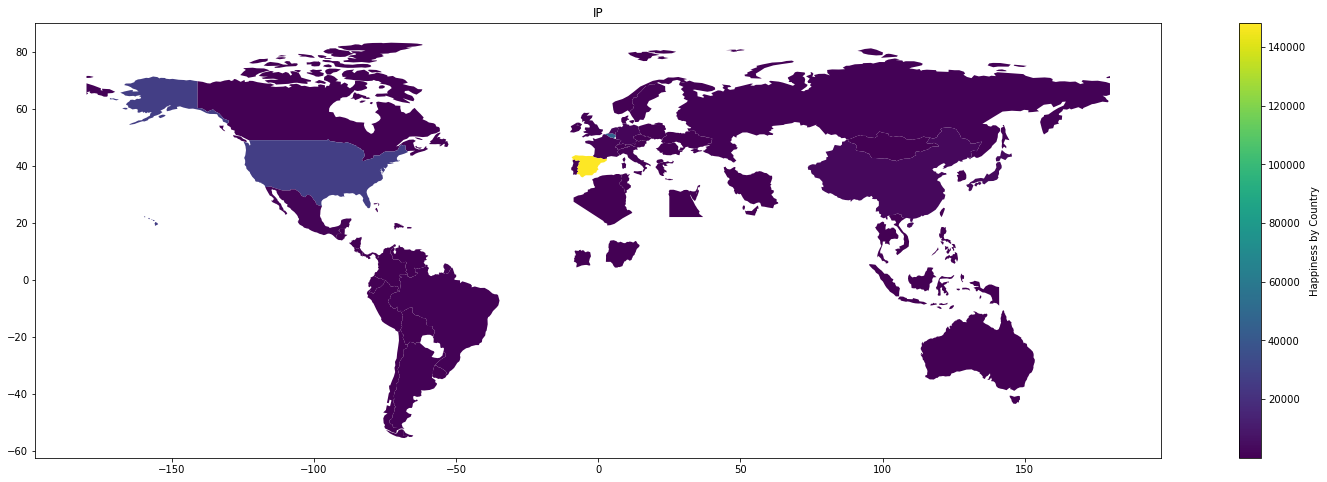

In [43]:


world_ip_final.plot("count",
                           figsize=(28,8),
                           legend=True,
                           legend_kwds={"label":"Happiness by Country"})
plt.title("IP")

### Mapa de burbujas

Utilizaremos cartopy referencia: https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map

In [44]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import cartopy.crs as crs
import cartopy.feature as cfeature#conda install -c conda-forge cartopy

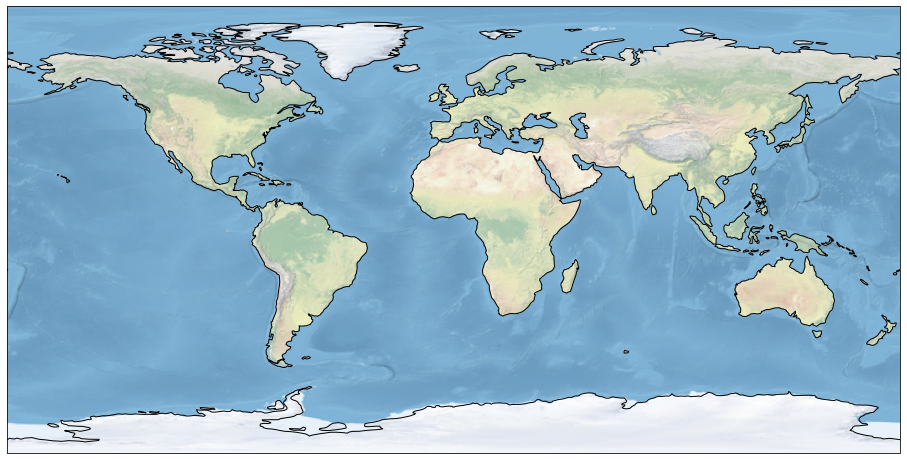

In [45]:

fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.stock_img()
ax.coastlines()

plt.show()

<AxesSubplot:>

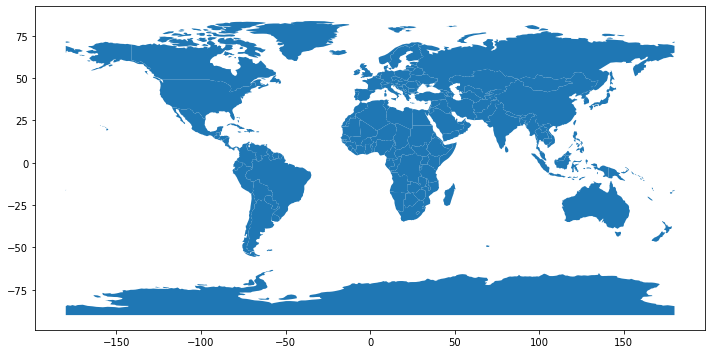

In [27]:
world.plot(figsize=(12,8))

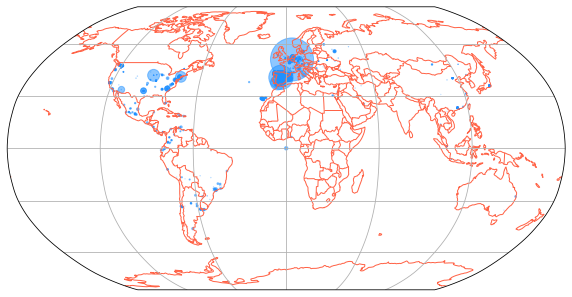

In [46]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=data_geo_map.longitude, y=data_geo_map.latitude,
            color="dodgerblue",
            s=(data_geo_map['count'])/25,
            alpha=0.5,
            transform=crs.PlateCarree()) ## Important

plt.show()

***